In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\SYS1\Downloads\Working\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.shape

(918, 12)

In [11]:
print("sex",df['Sex'].unique())
print("ChestPainType",df['ChestPainType'].unique())
print("RestingECG",df['RestingECG'].unique())
print("ExerciseAngina",df['ExerciseAngina'].unique())

sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']


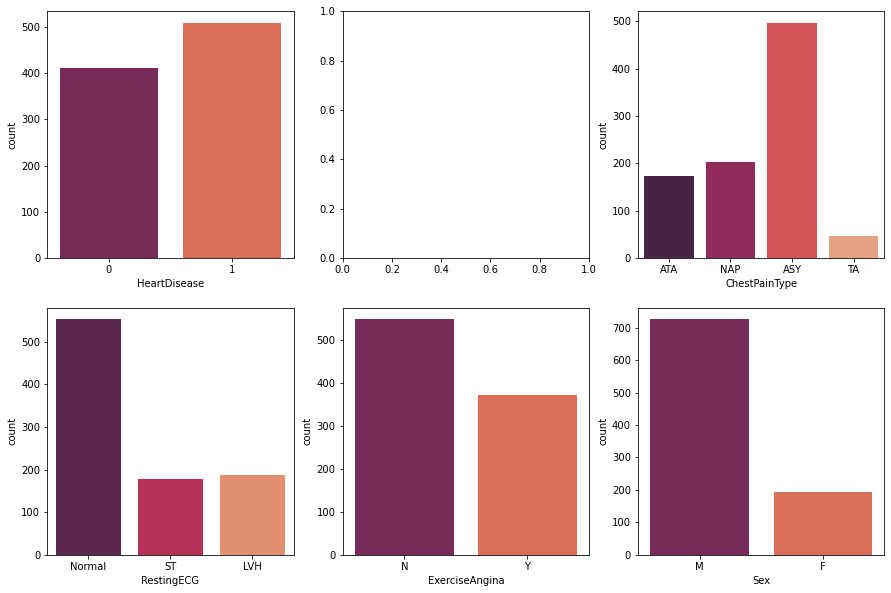

In [17]:
#Lets see how data is distributed
f, axes = plt.subplots(2,3, figsize =(15, 10))

sns.countplot(x=df['HeartDisease'],palette='rocket',data=df,ax=axes[0,0])
sns.countplot(x=df['ChestPainType'],palette='rocket',data=df,ax=axes[0,2])
sns.countplot(x=df['RestingECG'],palette='rocket',data=df,ax=axes[1,0])
sns.countplot(x=df['ExerciseAngina'],palette='rocket',data=df,ax=axes[1,1])
sns.countplot(x=df['Sex'],palette='rocket',data=df,ax=axes[1,2])
plt.show()

<Figure size 1080x720 with 0 Axes>

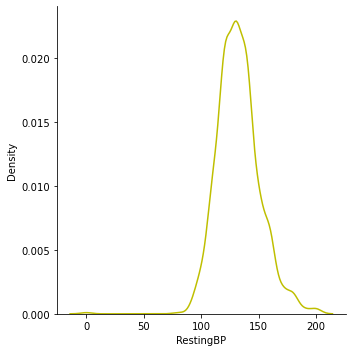

In [19]:
plt.figure(figsize = (15,10))
sns.displot(df['RestingBP'], color = 'y',kind='kde')

plt.show()

<Figure size 1440x720 with 0 Axes>

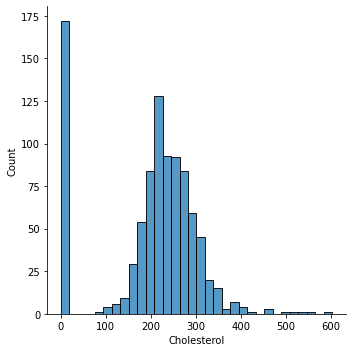

In [20]:
plt.figure(figsize =(20,10))
sns.displot(df['Cholesterol'])

plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:>

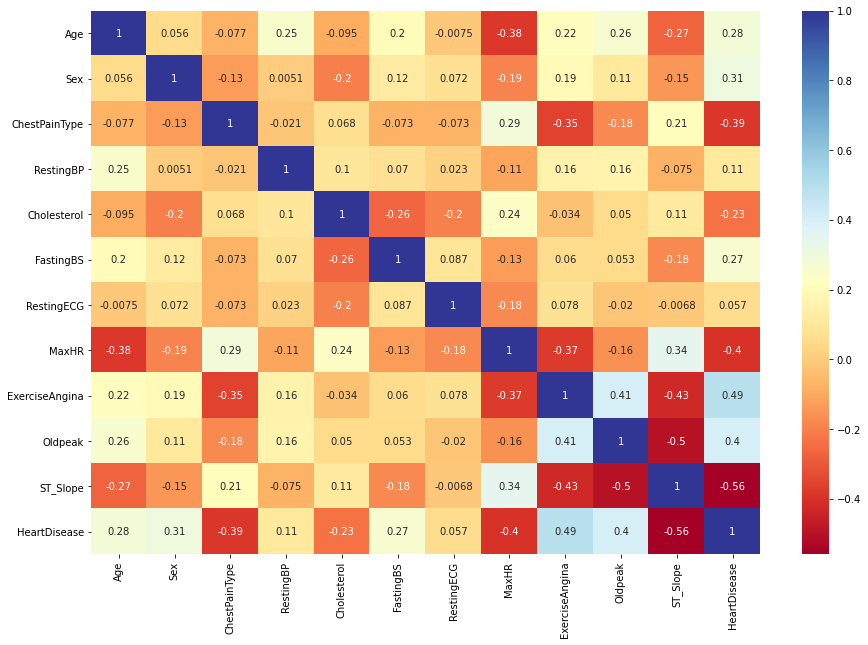

In [23]:
plt.figure(figsize =(15,10))
sns.heatmap(df.corr(),annot=True, cmap ='RdYlBu')

In [24]:
X= df.drop(['HeartDisease'],axis =1)
y=df['HeartDisease']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4)

print("X_train: ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (550, 11)
X_test :  (368, 11)
y_train:  (550,)
y_test:  (368,)


In [29]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(n_estimators=500,learning_rate=0.01, random_state=0)
model=abc.fit(X_train,y_train)

In [31]:
y_pred_adaboost= model.predict(X_test)
print(y_pred_adaboost)

[0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1]


In [32]:
from sklearn.metrics import accuracy_score

print("Adaboost classifier model accuracy:",accuracy_score(y_test,y_pred_adaboost))

Adaboost classifier model accuracy: 0.8505434782608695


In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,random_state=0)
model=gbc.fit(X_train,y_train)

In [34]:
y_pred_XGboost = model.predict(X_test)
print(y_pred_XGboost)

[0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1
 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1]


In [35]:
from sklearn.metrics import accuracy_score

print("XGBoost classifier model accuracy: ",accuracy_score(y_test,y_pred_XGboost))

XGBoost classifier model accuracy:  0.8668478260869565


<AxesSubplot:xlabel='accuracy', ylabel='algorithms'>

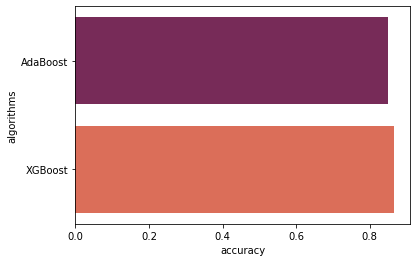

In [38]:
acc = pd.DataFrame({
    "algorithms":['AdaBoost','XGBoost'],
    "accuracy":[accuracy_score(y_test,y_pred_adaboost),accuracy_score(y_test,y_pred_XGboost)]
})
sns.barplot(x='accuracy',y='algorithms',data=acc, palette='rocket')